In [13]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
#loading the dataset
df = pd.read_csv('/content/online_ad_AB.csv')

In [3]:
df.head()

,customerID,test group,made_purchase,days_with_most_add,peak ad hours,ad_count
0,1,ad,False,24,20,5
1,2,psa,False,21,16,9
2,3,psa,False,1,18,8
3,4,ad,False,20,23,7
4,5,ad,False,3,13,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customerID          20000 non-null  int64 
 1   test group          20000 non-null  object
 2   made_purchase       20000 non-null  bool  
 3   days_with_most_add  20000 non-null  int64 
 4   peak ad hours       20000 non-null  int64 
 5   ad_count            20000 non-null  int64 
dtypes: bool(1), int64(4), object(1)
memory usage: 800.9+ KB


In [5]:
df.shape

(20000, 6)

In [6]:
df.describe()

,customerID,days_with_most_add,peak ad hours,ad_count
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,15.536300,15.878450,6.392150
std,5773.647028,8.657444,6.212939,2.546447
min,1.000000,1.000000,0.000000,1.000000
25%,5000.750000,8.000000,14.500000,5.000000
50%,10000.500000,16.000000,18.000000,7.000000
75%,15000.250000,23.000000,21.000000,9.000000
max,20000.000000,30.000000,23.000000,10.000000


# Data Preprocessing

In [7]:
#ensuring consistency and clarity in the column names
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
df.head()

,customerID,test_group,made_purchase,days_with_most_add,peak_ad_hours,ad_count
0,1,ad,False,24,20,5
1,2,psa,False,21,16,9
2,3,psa,False,1,18,8
3,4,ad,False,20,23,7
4,5,ad,False,3,13,5


In [8]:
#checking for null values
df.isnull().sum()

,0
customerID,0
test_group,0
made_purchase,0
days_with_most_add,0
peak_ad_hours,0
ad_count,0


In [9]:
#checking for duplicated values
df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis

In [12]:
# checking the distribution of the test group
print(df['test_group'].value_counts())

test_group
ad     12053
psa     7947
Name: count, dtype: int64


Purchase Rate comparison

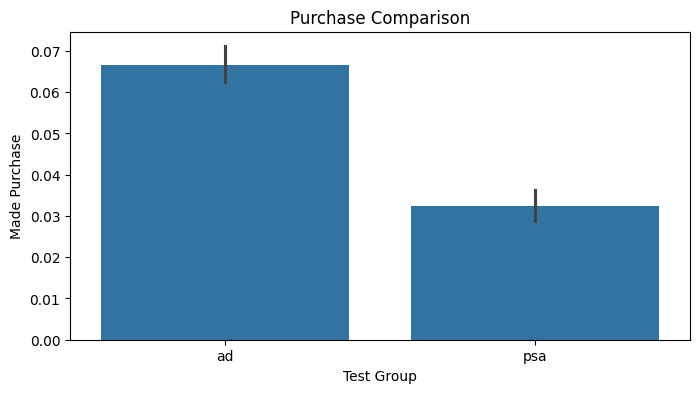

In [15]:
plt.figure(figsize=(8,4))
sns.barplot( data = df , x='test_group' , y='made_purchase')
plt.xlabel('Test Group')
plt.ylabel('Made Purchase')
plt.title('Purchase Comparison')
plt.show()

Ad count vs Test group

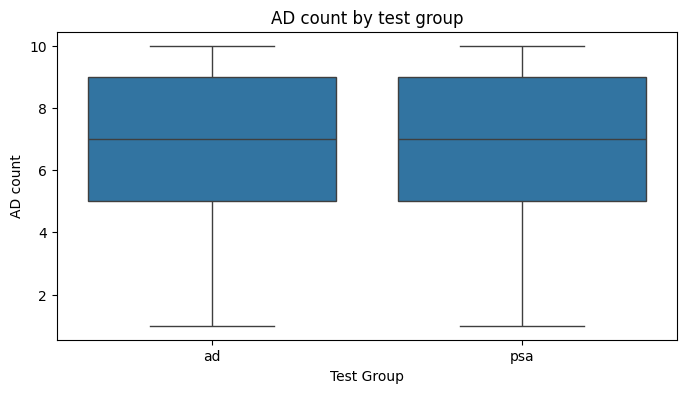

In [16]:
plt.figure(figsize=(8,4))
sns.boxplot( data = df , x='test_group' , y='ad_count')
plt.xlabel('Test Group')
plt.ylabel('AD count')
plt.title('AD count by test group')
plt.show()

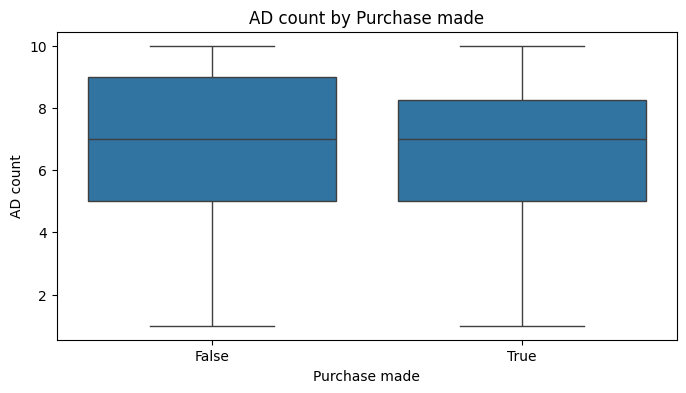

In [17]:
plt.figure(figsize=(8,4))
sns.boxplot( data = df , x='made_purchase' , y='ad_count')
plt.xlabel('Purchase made')
plt.ylabel('AD count')
plt.title('AD count by Purchase made')
plt.show()

Test group by peak ad hours

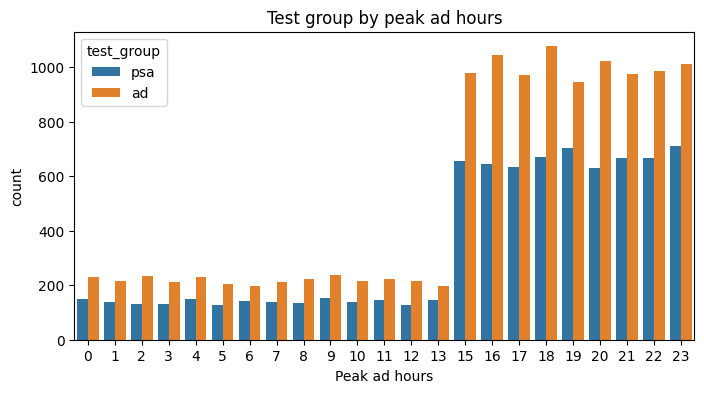

In [20]:
plt.figure(figsize=(8,4))
sns.countplot( data = df , x='peak_ad_hours' , hue='test_group')
plt.xlabel('Peak ad hours')
plt.title(' peak ad hours')
plt.show()

Days with most ads

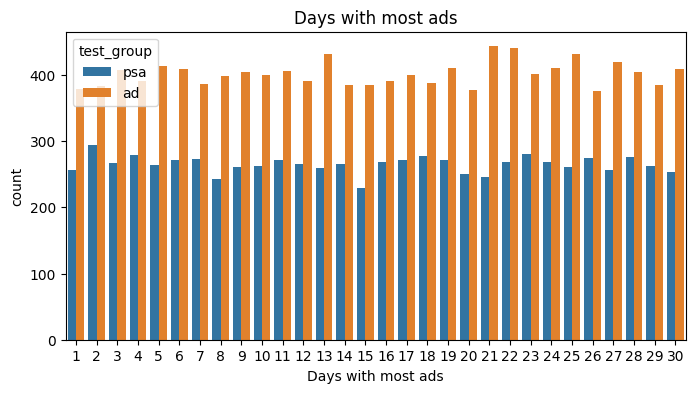

In [22]:
plt.figure(figsize=(8,4))
sns.countplot( data = df , x='days_with_most_add' , hue='test_group')
plt.xlabel('Days with most ads')
plt.title('Days with most ads')
plt.show()

# Hypothesis

The next step in the A/B testing is to formulate a hypothesis .In our case, we hypothesize that the use of  ad can lead to an increase in sales

* Null Hypothesis : there is no significant difference in sales between the 'ads' group and the 'psa' group .

*Alternative hypothesis : that the purchase rate in the 'ads' group is higher than in the 'psa' group

Computing the purchase rate for the test group


In [14]:
# checking the number of users who made a purchase and who did not
df.groupby('made_purchase').count()['test_group']

,test_group
made_purchase,
False,18940
True,1060


In [13]:
df.groupby('test_group')['made_purchase'].mean()

,made_purchase
test_group,
ad,0.066622
psa,0.032339


This gives the purchase rate of ad group and purchase rate of psa group

## Run A/B Significance Test

For this A/B testing , z-test will be used due to the large sample size .

In [15]:
from statsmodels.stats.proportion import proportions_ztest

#counts
purchase_counts = df.groupby('test_group')['made_purchase'].sum().values

#sample size
sample_size = df.groupby('test_group')['made_purchase'].count().values

#z-test
stat, pval = proportions_ztest(purchase_counts, sample_size)

print("Z-statisitc:", stat)
print("p-value:", pval)

Z-statisitc: 10.590153051109288
p-value: 3.310501343616513e-26


The p value < 0.05 , hence there is a significant difference in sales between the 'ads' group and the 'psa' group.

# Results

After conducting A/B testing on the Online Advertising Effectiveness study , our findings demonstrate a statistically significant difference in sales between the 'ads' group and the 'psa' group . As a result we can conclude that the advertisement has a significant impact on consumer purchasing behavior